<a href="https://colab.research.google.com/github/meng430/repo0/blob/main/Data_Analysis%E6%9C%9F%E6%9C%AB%E4%BD%9C%E6%A5%AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW03 Data Analysis

## 標題：現代性別在職場上的薪資差異

## 摘要

本篇報告基於薪情平台所提供的資料，包含男女從113年1月到114年3月，每人每月經常性薪資(新臺幣元)。分析性別與薪資之間的關係，並將資料視覺化，提供更清楚的差異比較。

## 引言

### 背景

性別薪資差異是常被討論的社會議題之一。雖然大家普遍認為應該要有相同工作就有相同薪水，但實際上，不同性別在不同產業中的薪資仍可能有落差。透過政府的開放資料，我們可以分析男女在各行各業的平均薪資，看看哪些產業的差距比較大、哪些比較接近，進一步了解目前職場上的性別薪資情況，


### 目的

在國高中階段的公民課，有學到男女在職場上有薪資差異，男性會比女性來得高。我想了解現在這種現象是否還有很明顯的差異，隔了一年時代會不會進步。本研究的目標是透過數據分析，找出男女在行業之間的薪資差異，了解現在市場的情況。


### 待達問題

1. 男女在是否仍然存在薪資上的差異?
2. 哪個行業男女在薪資上差異最大?
3. 哪些行業男生賺比較多?哪些行業女生賺比較多?


## 方法

### 數據來源
本研究使用 `薪情平台` 所提供的資料，包含男女從113年1月到114年3月，每人每月經常性薪資(新臺幣元)。

### 分析工具
- **Python**（數據處理與分析）
- **Pandas**（數據清理與統計分析）
- **Matplotlib / Seaborn**（數據視覺化）

### 數據處理
1. 載入數據集並檢視數據概況。
2. 繪製長條圖更直觀了解數據的關係


In [1]:
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

--2025-05-24 03:34:57--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 173.194.212.138, 173.194.212.139, 173.194.212.102, ...
Connecting to drive.google.com (drive.google.com)|173.194.212.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-05-24 03:34:57--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.196.132, 2607:f8b0:400c:c36::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.196.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘taipei_sans_tc_beta.ttf’

taipei_sans_tc_beta 100%[===================>]  19.70M  46.3MB/s    in 0.4s    

2025-05-24 03:35:0

In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 載入數據集

file_path = '/content/薪情平臺匯出資料_20250523192118.xlsx'
df = pd.read_excel(file_path, header=[0, 1])
df

/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Unnamed: 0_level_0 Unnamed: 1_level_0  \
                                   Unnamed: 0_level_1 Unnamed: 1_level_1   
0                                                 NaN                NaN   
1                                     每人每月經常性薪資(新臺幣元)             113年1月   
2                                                 NaN             113年2月   
3                                                 NaN             113年3月   
4                                                 NaN             113年4月   
5                                                 NaN             113年5月   
6                                                 NaN             113年6月   
7                                                 NaN             113年7月   
8                                                 NaN             113年8月   
9                                                 NaN             113年9月   
10                                                NaN            113年10月   
11                                                NaN            113年11月   
12                                                NaN            113年12月   
13                                                NaN             114年1月   
14                                                NaN             114年2月   
15                                                NaN             114年3月   
16                                                NaN                NaN   
17                                                 註:                NaN   
18  1. 本項統計涵蓋範圍自98年1月起新增「教育業（僅含教育輔助及其他教育業）」，自108年1...                NaN   
19          2. 因108年行業擴增幅度較大，為比較基礎一致，當年數據不與前一年資料進行比較。                NaN   

   工業及服務業            工業        礦業及土石採取業        石油及天然氣礦業         ...  \
        男      女      男      女        男      女        男      女  ...   
0     統計值    統計值    統計值    統計值      統計值    統計值      統計值    統計值  ...   
1   49198  42591  47930  36930    48356  38861    61754  64070  ...   
2   48949  42432  47489  36772    47711  38902    61503  62602  ...   
3   49197  42493  47879  37015    48205  39293    61526  63462  ...   
4   49428  42748  48037  37221    47822  38641    61603  63530  ...   
5   49693  42752  48284  37363    48154  39022    62013  63224  ...   
6   49654  42831  48238  37306    48417  39521    62323  63439  ...   
7   49765  42850  48300  37366    48573  39464    62624  62826  ...   
8   49942  43052  48569  37580    48958  39410    62918  63494  ...   
9   49834  42950  48593  37644    50121  40531    65545  67064  ...   
10  49657  42855  48400  37474    49948  40432    65415  66986  ...   
11  49936  43007  48703  37730    49839  40550    65491  66925  ...   
12  50199  43266  48975  37950    50381  40621    65393  67219  ...   
13  50642  43795  49372  38381    50636  41047    66275  67930  ...   
14  50473  43689  49243  38333    50047  40911    64070  65251  ...   
15  50752  43838  49516  38504    50192  40903    64059  65028  ...   
16    NaN    NaN    NaN    NaN      NaN    NaN      NaN    NaN  ...   
17    NaN    NaN    NaN    NaN      NaN    NaN      NaN    NaN  ...   
18    NaN    NaN    NaN    NaN      NaN    NaN      NaN    NaN  ...   
19    NaN    NaN    NaN    NaN      NaN    NaN      NaN    NaN  ...   

   運動﹑娛樂及休閒服務業         其他服務業        個人及家庭用品維修業        美髮及美容美體業        其他個人服務業  \
             男      女      男      女          男      女        男      女       男   
0          統計值    統計值    統計值    統計值        統計值    統計值      統計值    統計值     統計值   
1        46150  27814  38507  33808      38953  33524    40764  30832   37728   
2        46080  27618  38276  33442      38223  33249    40645  30604   38144   
3        47874  28479  38478  33473      38282  32896    41521  30480   38477   
4        47598  28265  38448  33661      38479  32831    40942  30511   38192   
5        48946  28442  38599  33774      38622  32954    41291  30647   38340   
6        48249  28141  38433  33724      38595  33102    40685  30889   38024   
7        47906  28387  38303  33676      38713  33135    40306  31001 

## 數據處理

In [4]:
df.drop(df.columns[0], axis=1, inplace=True)
df = df[:-4]
df

Unnamed: 1_level_0 工業及服務業            工業        礦業及土石採取業        石油及天然氣礦業  \
   Unnamed: 1_level_1      男      女      男      女        男      女        男   
0                 NaN    統計值    統計值    統計值    統計值      統計值    統計值      統計值   
1              113年1月  49198  42591  47930  36930    48356  38861    61754   
2              113年2月  48949  42432  47489  36772    47711  38902    61503   
3              113年3月  49197  42493  47879  37015    48205  39293    61526   
4              113年4月  49428  42748  48037  37221    47822  38641    61603   
5              113年5月  49693  42752  48284  37363    48154  39022    62013   
6              113年6月  49654  42831  48238  37306    48417  39521    62323   
7              113年7月  49765  42850  48300  37366    48573  39464    62624   
8              113年8月  49942  43052  48569  37580    48958  39410    62918   
9              113年9月  49834  42950  48593  37644    50121  40531    65545   
10            113年10月  49657  42855  48400  37474    49948  40432    65415   
11            113年11月  49936  43007  48703  37730    49839  40550    65491   
12            113年12月  50199  43266  48975  37950    50381  40621    65393   
13             114年1月  50642  43795  49372  38381    50636  41047    66275   
14             114年2月  50473  43689  49243  38333    50047  40911    64070   
15             114年3月  50752  43838  49516  38504    50192  40903    64059   

          砂﹑石採取及其他礦業  ... 運動﹑娛樂及休閒服務業         其他服務業        個人及家庭用品維修業         \
        女          男  ...           男      女      男      女          男      女   
0     統計值        統計值  ...         統計值    統計值    統計值    統計值        統計值    統計值   
1   64070      36740  ...       46150  27814  38507  33808      38953  33524   
2   62602      35826  ...       46080  27618  38276  33442      38223  33249   
3   63462      36435  ...       47874  28479  38478  33473      38282  32896   
4   63530      35773  ...       47598  28265  38448  33661      38479  32831   
5   63224      35840  ...       48946  28442  38599  33774      38622  32954   
6   63439      35904  ...       48249  28141  38433  33724      38595  33102   
7   62826      36082  ...       47906  28387  38303  33676      38713  33135   
8   63494      36731  ...       48286  28899  38702  33509      39004  33040   
9   67064      36559  ...       48334  28702  38528  33540      39156  32915   
10  66986      36430  ...       47855  28491  38408  33614      39210  32653   
11  66925      36053  ...       47696  28733  38538  34020      39278  32715   
12  67219      37188  ...       48159  28986  38729  34205      39569  32990   
13  67930      36881  ...       48023  29173  38992  34632      39652  33525   
14  65251      37095  ...       48633  28747  38951  34544      39367  33196   
15  65028      37570  ...       49838  29397  39116  34541      39229  32858   

   美髮及美容美體業        其他個人服務業         
          男      女       男      女  
0       統計值    統計值     統計值    統計值  
1     40764  30832   37728  40779  
2     40645  30604   38144  39922  
3     41521  30480   38477  40448  
4     40942  30511   38192  40947  
5     41291  30647   38340  41128  
6     40685  30889   38024  40293  
7     40306  31001   37578  39833  
8     40226  31021   38172  39344  
9     40442  31277   37526  39015  
10    40711  31498   37128  38930  
11    41337  32021   37289  39437  
12    41459  32398   37355  39150  
13    42394  32622   37846  40057  
14    42236  32573   38135  40116  
15    41882  32365   38747  40904  

[16 rows x 233 columns]

In [5]:
df = df.iloc[1:].reset_index(drop=True)
df

Unnamed: 1_level_0 工業及服務業            工業        礦業及土石採取業        石油及天然氣礦業  \
   Unnamed: 1_level_1      男      女      男      女        男      女        男   
0              113年1月  49198  42591  47930  36930    48356  38861    61754   
1              113年2月  48949  42432  47489  36772    47711  38902    61503   
2              113年3月  49197  42493  47879  37015    48205  39293    61526   
3              113年4月  49428  42748  48037  37221    47822  38641    61603   
4              113年5月  49693  42752  48284  37363    48154  39022    62013   
5              113年6月  49654  42831  48238  37306    48417  39521    62323   
6              113年7月  49765  42850  48300  37366    48573  39464    62624   
7              113年8月  49942  43052  48569  37580    48958  39410    62918   
8              113年9月  49834  42950  48593  37644    50121  40531    65545   
9             113年10月  49657  42855  48400  37474    49948  40432    65415   
10            113年11月  49936  43007  48703  37730    49839  40550    65491   
11            113年12月  50199  43266  48975  37950    50381  40621    65393   
12             114年1月  50642  43795  49372  38381    50636  41047    66275   
13             114年2月  50473  43689  49243  38333    50047  40911    64070   
14             114年3月  50752  43838  49516  38504    50192  40903    64059   

          砂﹑石採取及其他礦業  ... 運動﹑娛樂及休閒服務業         其他服務業        個人及家庭用品維修業         \
        女          男  ...           男      女      男      女          男      女   
0   64070      36740  ...       46150  27814  38507  33808      38953  33524   
1   62602      35826  ...       46080  27618  38276  33442      38223  33249   
2   63462      36435  ...       47874  28479  38478  33473      38282  32896   
3   63530      35773  ...       47598  28265  38448  33661      38479  32831   
4   63224      35840  ...       48946  28442  38599  33774      38622  32954   
5   63439      35904  ...       48249  28141  38433  33724      38595  33102   
6   62826      36082  ...       47906  28387  38303  33676      38713  33135   
7   63494      36731  ...       48286  28899  38702  33509      39004  33040   
8   67064      36559  ...       48334  28702  38528  33540      39156  32915   
9   66986      36430  ...       47855  28491  38408  33614      39210  32653   
10  66925      36053  ...       47696  28733  38538  34020      39278  32715   
11  67219      37188  ...       48159  28986  38729  34205      39569  32990   
12  67930      36881  ...       48023  29173  38992  34632      39652  33525   
13  65251      37095  ...       48633  28747  38951  34544      39367  33196   
14  65028      37570  ...       49838  29397  39116  34541      39229  32858   

   美髮及美容美體業        其他個人服務業         
          男      女       男      女  
0     40764  30832   37728  40779  
1     40645  30604   38144  39922  
2     41521  30480   38477  40448  
3     40942  30511   38192  40947  
4     41291  30647   38340  41128  
5     40685  30889   38024  40293  
6     40306  31001   37578  39833  
7     40226  31021   38172  39344  
8     40442  31277   37526  39015  
9     40711  31498   37128  38930  
10    41337  32021   37289  39437  
11    41459  32398   37355  39150  
12    42394  32622   37846  40057  
13    42236  32573   38135  40116  
14    41882  32365   38747  40904  

[15 rows x 233 columns]

In [7]:
df = df.set_index('Unnamed: 1_level_0')
print(type(df.index))
df.index.name = '月份'
df

<class 'pandas.core.indexes.base.Index'>


工業及服務業            工業        礦業及土石採取業        石油及天然氣礦業         \
                男      女      男      女        男      女        男      女   
月份                                                                       
(113年1月,)   49198  42591  47930  36930    48356  38861    61754  64070   
(113年2月,)   48949  42432  47489  36772    47711  38902    61503  62602   
(113年3月,)   49197  42493  47879  37015    48205  39293    61526  63462   
(113年4月,)   49428  42748  48037  37221    47822  38641    61603  63530   
(113年5月,)   49693  42752  48284  37363    48154  39022    62013  63224   
(113年6月,)   49654  42831  48238  37306    48417  39521    62323  63439   
(113年7月,)   49765  42850  48300  37366    48573  39464    62624  62826   
(113年8月,)   49942  43052  48569  37580    48958  39410    62918  63494   
(113年9月,)   49834  42950  48593  37644    50121  40531    65545  67064   
(113年10月,)  49657  42855  48400  37474    49948  40432    65415  66986   
(113年11月,)  49936  43007  48703  37730    49839  40550    65491  66925   
(113年12月,)  50199  43266  48975  37950    50381  40621    65393  67219   
(114年1月,)   50642  43795  49372  38381    50636  41047    66275  67930   
(114年2月,)   50473  43689  49243  38333    50047  40911    64070  65251   
(114年3月,)   50752  43838  49516  38504    50192  40903    64059  65028   

           砂﹑石採取及其他礦業         ... 運動﹑娛樂及休閒服務業         其他服務業        個人及家庭用品維修業  \
                    男      女  ...           男      女      男      女          男   
月份                            ...                                               
(113年1月,)       36740  25901  ...       46150  27814  38507  33808      38953   
(113年2月,)       35826  26566  ...       46080  27618  38276  33442      38223   
(113年3月,)       36435  26860  ...       47874  28479  38478  33473      38282   
(113年4月,)       35773  26079  ...       47598  28265  38448  33661      38479   
(113年5月,)       35840  26339  ...       48946  28442  38599  33774      38622   
(113年6月,)       35904  26869  ...       48249  28141  38433  33724      38595   
(113年7月,)       36082  27219  ...       47906  28387  38303  33676      38713   
(113年8月,)       36731  27169  ...       48286  28899  38702  33509      39004   
(113年9月,)       36559  27233  ...       48334  28702  38528  33540      39156   
(113年10月,)      36430  27155  ...       47855  28491  38408  33614      39210   
(113年11月,)      36053  27299  ...       47696  28733  38538  34020      39278   
(113年12月,)      37188  27572  ...       48159  28986  38729  34205      39569   
(114年1月,)       36881  27605  ...       48023  29173  38992  34632      39652   
(114年2月,)       37095  28215  ...       48633  28747  38951  34544      39367   
(114年3月,)       37570  28321  ...       49838  29397  39116  34541      39229   

                  美髮及美容美體業        其他個人服務業         
                女        男      女       男      女  
月份                                                
(113年1月,)   33524    40764  30832   37728  40779  
(113年2月,)   33249    40645  30604   38144  39922  
(113年3月,)   32896    41521  30480   38477  40448  
(113年4月,)   32831    40942  30511   38192  40947  
(113年5月,)   32954    41291  30647   38340  41128  
(113年6月,)   33102    40685  30889   38024  40293  
(113年7月,)   33135    40306  31001   37578  39833  
(113年8月,)   33040    40226  31021   38172  39344  
(113年9月,)   32915    40442  31277   37526  39015  
(113年10月,)  32653    40711  31498   37128  38930  
(113年11月,)  32715    41337  32021   37289  39437  
(113年12月,)  32990    41459  32398   37355  39150  
(114年1月,)   33525    42394  32622   37846  40057  
(114年2月,)   33196    42236  32573   38135  40116  
(114年3月,)   32858    41882  32365   38747  40904  

[15 rows x 232 columns]

In [8]:
df.index = df.index.map(lambda x: x[0] if isinstance(x, tuple) else x)
df

工業及服務業            工業        礦業及土石採取業        石油及天然氣礦業         \
             男      女      男      女        男      女        男      女   
月份                                                                    
113年1月   49198  42591  47930  36930    48356  38861    61754  64070   
113年2月   48949  42432  47489  36772    47711  38902    61503  62602   
113年3月   49197  42493  47879  37015    48205  39293    61526  63462   
113年4月   49428  42748  48037  37221    47822  38641    61603  63530   
113年5月   49693  42752  48284  37363    48154  39022    62013  63224   
113年6月   49654  42831  48238  37306    48417  39521    62323  63439   
113年7月   49765  42850  48300  37366    48573  39464    62624  62826   
113年8月   49942  43052  48569  37580    48958  39410    62918  63494   
113年9月   49834  42950  48593  37644    50121  40531    65545  67064   
113年10月  49657  42855  48400  37474    49948  40432    65415  66986   
113年11月  49936  43007  48703  37730    49839  40550    65491  66925   
113年12月  50199  43266  48975  37950    50381  40621    65393  67219   
114年1月   50642  43795  49372  38381    50636  41047    66275  67930   
114年2月   50473  43689  49243  38333    50047  40911    64070  65251   
114年3月   50752  43838  49516  38504    50192  40903    64059  65028   

        砂﹑石採取及其他礦業         ... 運動﹑娛樂及休閒服務業         其他服務業        個人及家庭用品維修業  \
                 男      女  ...           男      女      男      女          男   
月份                         ...                                               
113年1月       36740  25901  ...       46150  27814  38507  33808      38953   
113年2月       35826  26566  ...       46080  27618  38276  33442      38223   
113年3月       36435  26860  ...       47874  28479  38478  33473      38282   
113年4月       35773  26079  ...       47598  28265  38448  33661      38479   
113年5月       35840  26339  ...       48946  28442  38599  33774      38622   
113年6月       35904  26869  ...       48249  28141  38433  33724      38595   
113年7月       36082  27219  ...       47906  28387  38303  33676      38713   
113年8月       36731  27169  ...       48286  28899  38702  33509      39004   
113年9月       36559  27233  ...       48334  28702  38528  33540      39156   
113年10月      36430  27155  ...       47855  28491  38408  33614      39210   
113年11月      36053  27299  ...       47696  28733  38538  34020      39278   
113年12月      37188  27572  ...       48159  28986  38729  34205      39569   
114年1月       36881  27605  ...       48023  29173  38992  34632      39652   
114年2月       37095  28215  ...       48633  28747  38951  34544      39367   
114年3月       37570  28321  ...       49838  29397  39116  34541      39229   

               美髮及美容美體業        其他個人服務業         
             女        男      女       男      女  
月份                                             
113年1月   33524    40764  30832   37728  40779  
113年2月   33249    40645  30604   38144  39922  
113年3月   32896    41521  30480   38477  40448  
113年4月   32831    40942  30511   38192  40947  
113年5月   32954    41291  30647   38340  41128  
113年6月   33102    40685  30889   38024  40293  
113年7月   33135    40306  31001   37578  39833  
113年8月   33040    40226  31021   38172  39344  
113年9月   32915    40442  31277   37526  39015  
113年10月  32653    40711  31498   37128  38930  
113年11月  32715    41337  32021   37289  39437  
113年12月  32990    41459  32398   37355  39150  
114年1月   33525    42394  32622   37846  40057  
114年2月   33196    42236  32573   38135  40116  
114年3月   32858    41882  32365   38747  40904  

[15 rows x 232 columns]

## 結果與分析

In [9]:
font_path = '/content/taipei_sans_tc_beta.ttf'
font_prop = fm.FontProperties(fname=font_path)

In [6]:
print(type(df.columns[3][0]))
i = 2
industries = []
for i in range(1, len(df.columns), 2):
    col = df.columns[i]
    industry = col[0]  # 取出 MultiIndex 的第一層：產業名稱
    if industry not in industries:  # 避免重複
        industries.append(industry)
industries

<class 'str'>


['工業及服務業',
 '工業',
 '礦業及土石採取業',
 '石油及天然氣礦業',
 '砂﹑石採取及其他礦業',
 '製造業',
 '食品及飼品製造業',
 '飲料及菸草製造業',
 '紡織業',
 '成衣及服飾品製造業',
 '皮革﹑毛皮及其製品製造業',
 '木竹製品製造業',
 '紙漿﹑紙及紙製品製造業',
 '印刷及資料儲存媒體複製業',
 '石油及煤製品製造業',
 '化學材料及肥料製造業',
 '其他化學製品製造業',
 '藥品及醫用化學製品製造業',
 '橡膠製品製造業',
 '塑膠製品製造業',
 '非金屬礦物製品製造業',
 '基本金屬製造業',
 '金屬製品製造業',
 '電子零組件製造業',
 '電腦﹑電子產品及光學製品製造業',
 '電力設備及配備製造業',
 '機械設備製造業',
 '汽車及其零件製造業',
 '其他運輸工具及其零件製造業',
 '家具製造業',
 '其他製造業',
 '產業用機械設備維修及安裝業',
 '電力及燃氣供應業',
 '電力供應業',
 '氣體燃料供應業',
 '用水供應及污染整治業',
 '用水供應業',
 '廢水及污水處理業',
 '廢棄物清除業',
 '廢棄物處理業',
 '資源物回收處理及污染整治業',
 '營建工程業',
 '建築工程業',
 '土木工程業',
 '機電﹑管道及其他建築設備安裝業',
 '其他專門營造業',
 '服務業',
 '批發及零售業',
 '批發業',
 '零售業',
 '運輸及倉儲業',
 '鐵路及捷運運輸業',
 '公共汽車客運業',
 '其他汽車客運業',
 '汽車貨運業',
 '海洋水運業',
 '航空運輸業',
 '港埠業',
 '其他運輸輔助業',
 '倉儲業',
 '郵政業',
 '遞送服務業',
 '住宿及餐飲業',
 '住宿業',
 '餐飲業',
 '餐館',
 '其他餐飲業',
 '出版影音及資通訊業',
 '出版業',
 '影片及電視節目業;聲音錄製及音樂發行業',
 '廣播﹑電視節目編排及傳播業',
 '電信業',
 '電腦程式設計﹑諮詢及相關服務業',
 '資訊服務業',
 '金融及保險業',
 '銀行業',
 '信用合作社',
 '農會及漁會信用部',
 '其他金融服務業',
 '人身保險業',
 '財產保險業',
 '其他保險輔助業',
 '證券

In [10]:
diff_this_year_dict = {}
for industry in industries:
    diff = df.loc['114年3月', (industry, '男')] - df.loc['114年3月', (industry, '女')]
    diff_this_year_dict[industry] = diff


df_this_year_difference = pd.Series(diff_this_year_dict)
print('在114年中')
print('兩性薪資差異最大的是',df_this_year_difference.idxmax(), '男生比女生多賺',df_this_year_difference.max(),'元\n')
print('兩性薪資差異最小的是',df_this_year_difference.abs().idxmin(),'男生比女生多賺', df_this_year_difference.loc[df_this_year_difference.abs().idxmin()],'元\n')
print(df_this_year_difference.idxmin(), '是女生賺的比男生最多的行業，多賺了', abs(df_this_year_difference.min()), '元\n')
print('男生每人每月經常性薪資平均比女生多', df_this_year_difference.mean(), '元\n')
print('出版影音及資通訊業男生比女生多賺',df_this_year_difference.loc['出版影音及資通訊業'],'元\n')

count_male_higher = (df_this_year_difference > 0).sum()
print(f"男生薪資高於女生的行業有 {count_male_higher} 個\n")
count_female_higher = (df_this_year_difference < 0).sum()
print(f"女生薪資高於男生的行業有 {count_female_higher} 個")

在114年中
兩性薪資差異最大的是 航空運輸業 男生比女生多賺 51414 元

兩性薪資差異最小的是 電力供應業 男生比女生多賺 -90 元

人身保險業 是女生賺的比男生最多的行業，多賺了 17363 元

男生每人每月經常性薪資平均比女生多 7176.448275862069 元

出版影音及資通訊業男生比女生多賺 11797 元

男生薪資高於女生的行業有 96 個

女生薪資高於男生的行業有 20 個


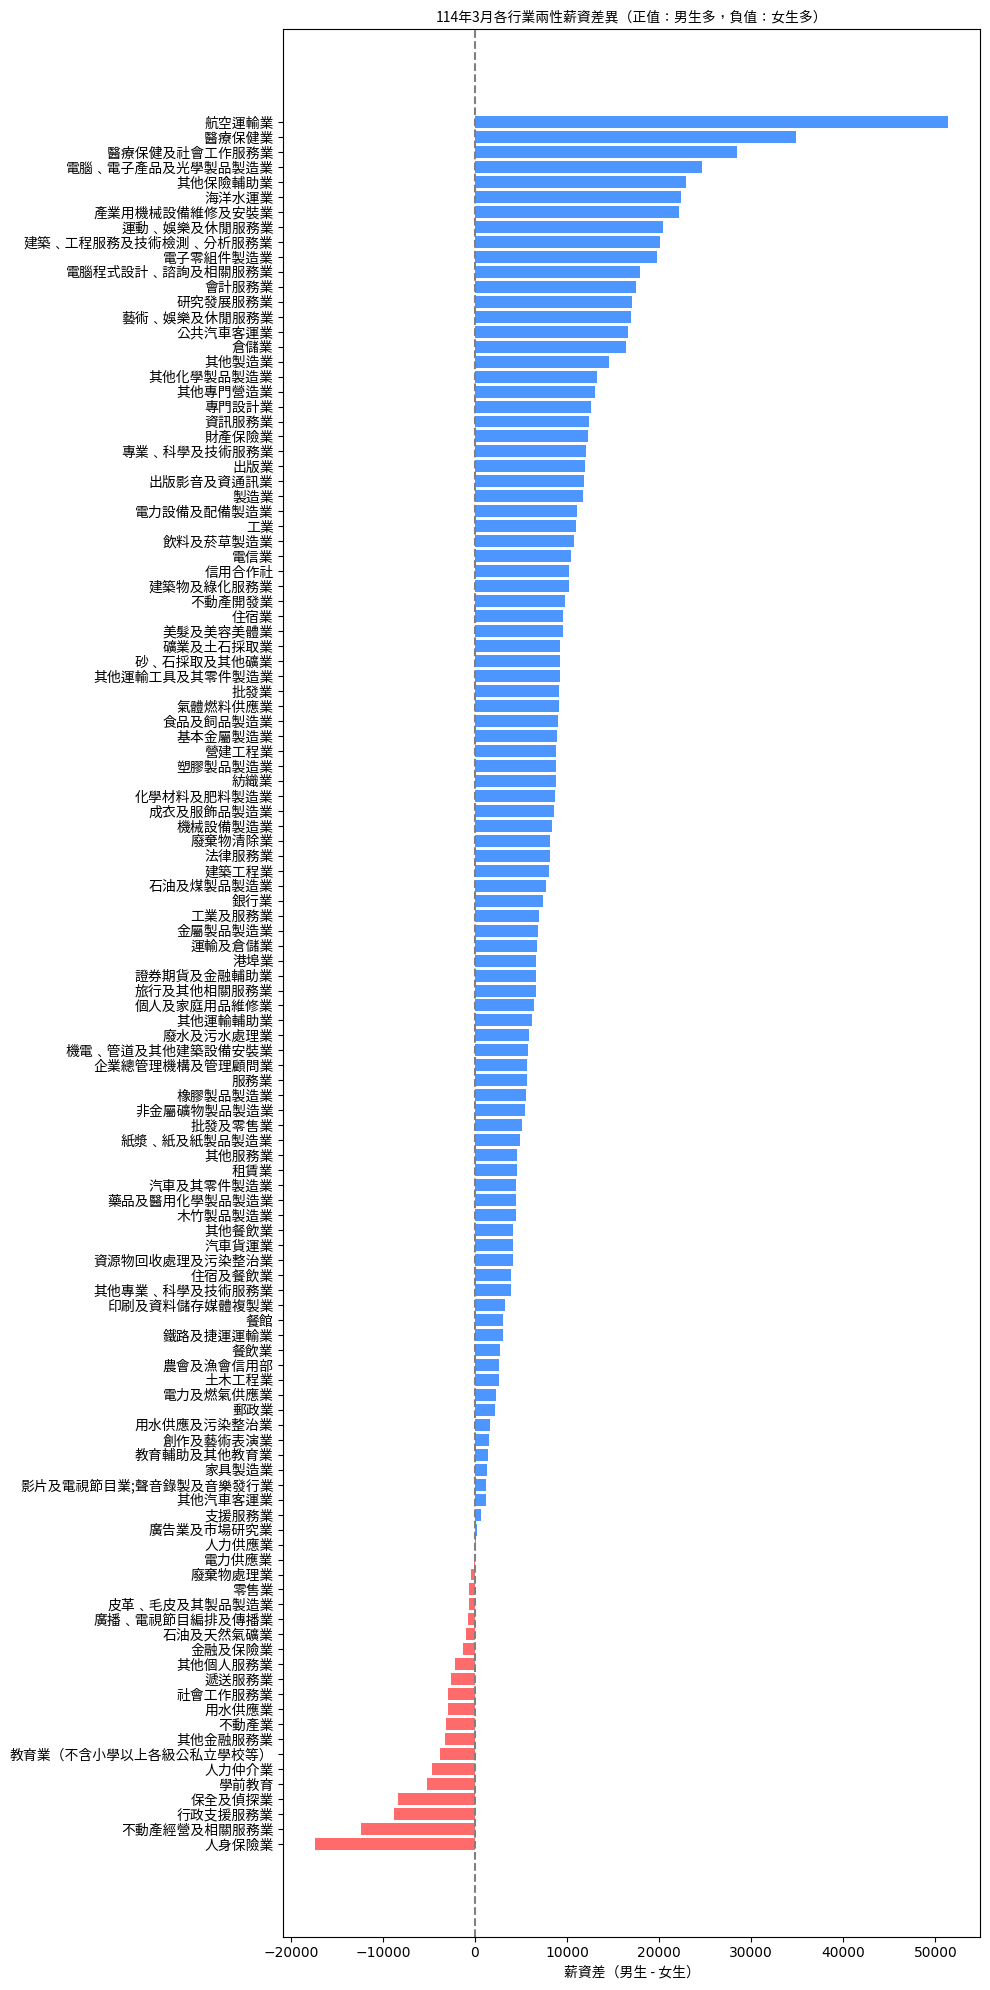

In [11]:
df_this_year_difference.sort_values(inplace=True)
plt.figure(figsize=(10, 20))
bars = plt.barh(df_this_year_difference.index,df_this_year_difference.values, color=['#FF6B6B' if val < 0 else '#4D96FF' for val in df_this_year_difference])
plt.yticks(fontproperties=font_prop)
plt.axvline(0, color='gray', linestyle='--')  # 0為基準線
plt.xlabel("薪資差（男生 - 女生）", fontproperties=font_prop)
plt.title("114年3月各行業兩性薪資差異（正值：男生多，負值：女生多）", fontproperties=font_prop)
plt.tight_layout()
plt.show()

In [12]:
diff_last_year_dict = {}
for industry in industries:
    diff = df.loc['113年3月', (industry, '男')] - df.loc['113年3月', (industry, '女')]
    diff_last_year_dict[industry] = diff


df_last_year_difference = pd.Series(diff_last_year_dict)
print('在113年中')
print('兩性薪資差異最大的是',df_last_year_difference.idxmax(), '男生比女生多賺',df_last_year_difference.max(),'元\n')
print('兩性薪資差異最小的是',df_last_year_difference.abs().idxmin(),'男生比女生多賺', df_last_year_difference.loc[df_last_year_difference.abs().idxmin()],'元\n')
print(df_last_year_difference.idxmin(), '是女生賺的比男生最多的行業，多賺了', abs(df_last_year_difference.min()), '元\n')
print('男生每人每月經常性薪資平均比女生多', df_last_year_difference.mean(), '元\n')
print('出版影音及資通訊業男生比女生多賺',df_last_year_difference.loc['出版影音及資通訊業'],'元\n')

count_male_higher = (df_last_year_difference > 0).sum()
print(f"男生薪資高於女生的行業有 {count_male_higher} 個\n")
count_female_higher = (df_last_year_difference < 0).sum()
print(f"女生薪資高於男生的行業有 {count_female_higher} 個")

在113年中
兩性薪資差異最大的是 航空運輸業 男生比女生多賺 50178 元

兩性薪資差異最小的是 教育輔助及其他教育業 男生比女生多賺 -14 元

人身保險業 是女生賺的比男生最多的行業，多賺了 15298 元

男生每人每月經常性薪資平均比女生多 6956.663793103448 元

出版影音及資通訊業男生比女生多賺 11539 元

男生薪資高於女生的行業有 95 個

女生薪資高於男生的行業有 21 個


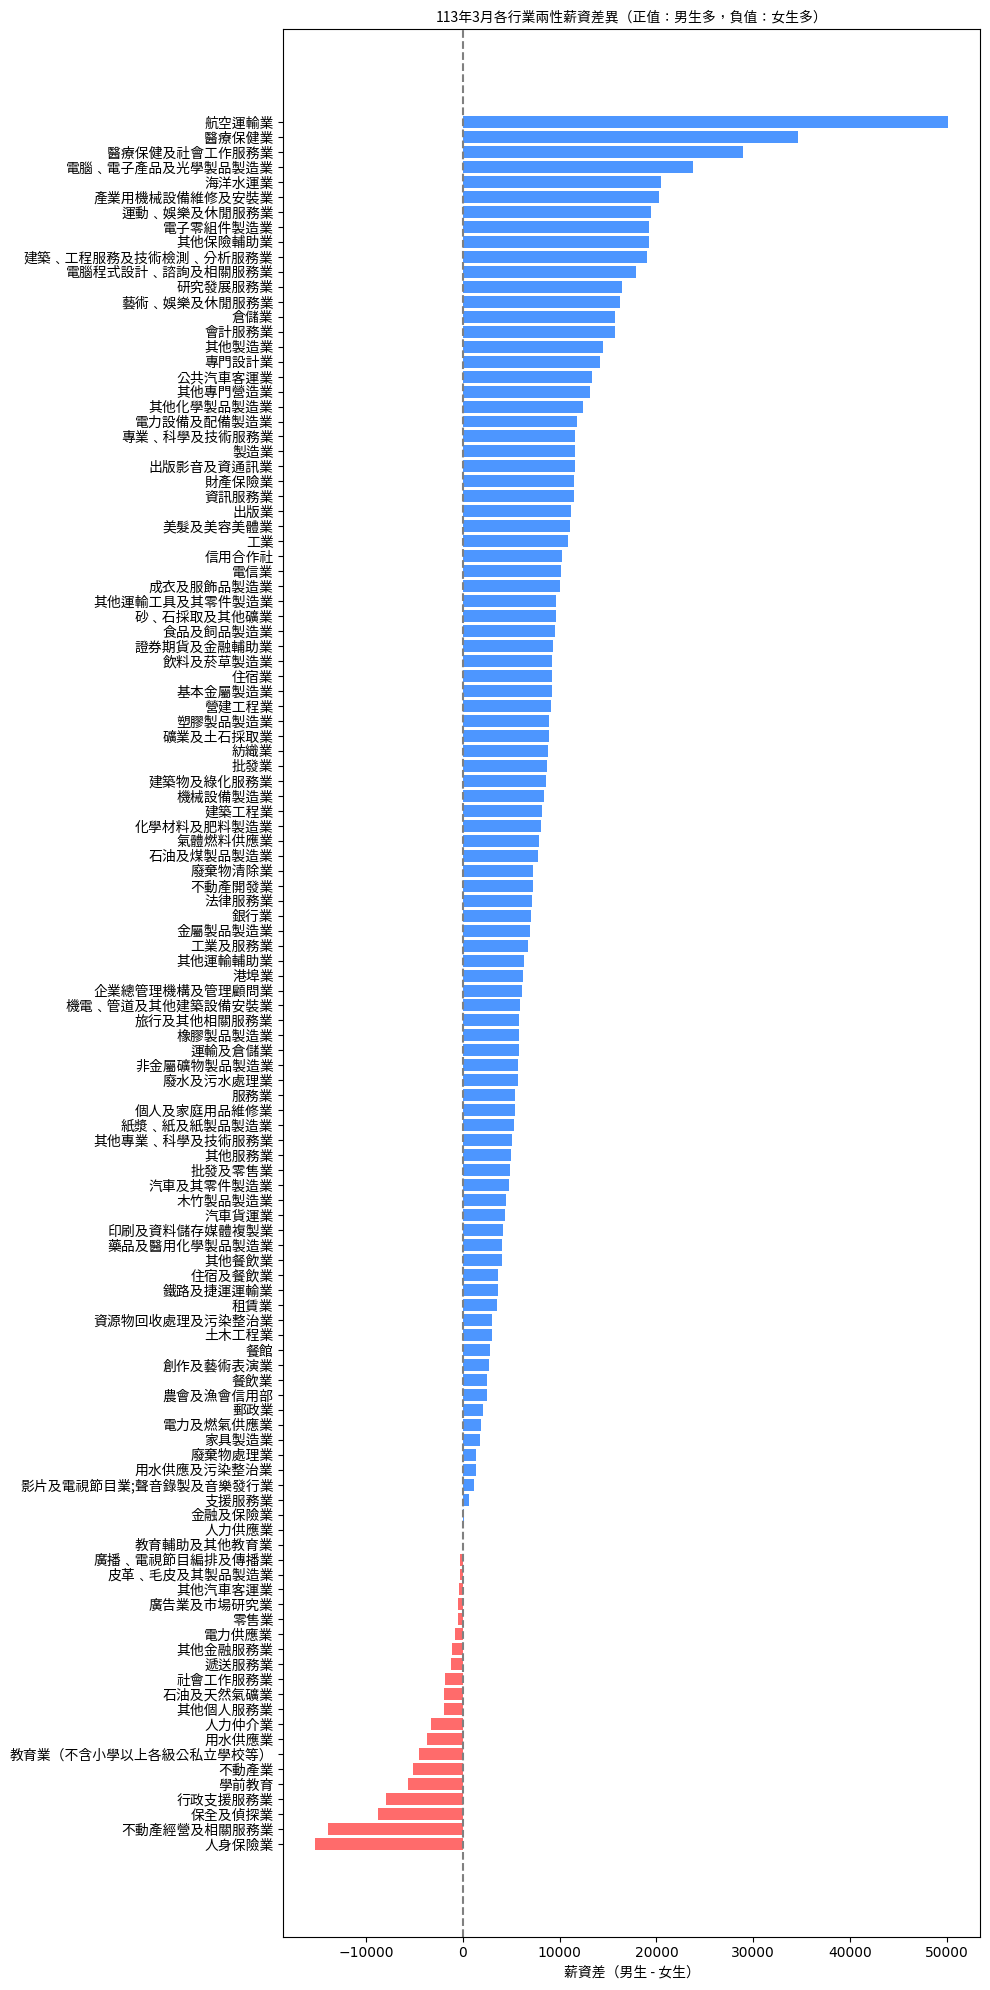

In [13]:
df_last_year_difference.sort_values(inplace=True)
plt.figure(figsize=(10, 20))
bars = plt.barh(df_last_year_difference.index,df_last_year_difference.values, color=['#FF6B6B' if val < 0 else '#4D96FF' for val in df_last_year_difference])
plt.yticks(fontproperties=font_prop)
plt.axvline(0, color='gray', linestyle='--')  # 0為基準線
plt.xlabel("薪資差（男生 - 女生）", fontproperties=font_prop)
plt.title("113年3月各行業兩性薪資差異（正值：男生多，負值：女生多）", fontproperties=font_prop)
plt.tight_layout()
plt.show()

### 兩年比較

In [14]:
female_more_2024 = df_last_year_difference[df_last_year_difference < 0]
female_more_2025 = df_this_year_difference[df_this_year_difference < 0]

female_only_2024 = female_more_2024.index.difference(female_more_2025.index)
female_only_2025 = female_more_2025.index.difference(female_more_2024.index)

print('只有在2024女生賺得比男生多的行業',female_only_2024)
print('只有在2025女生賺得比男生多的行業', female_only_2025)

只有在2024女生賺得比男生多的行業 Index(['其他汽車客運業', '廣告業及市場研究業', '教育輔助及其他教育業'], dtype='object')
只有在2025女生賺得比男生多的行業 Index(['廢棄物處理業', '金融及保險業'], dtype='object')


## 結論與建議


### 結論
1. 在兩年的數據都能清楚看到，男性賺得比女性多的行業佔多數
2. 隔了一年整體的情況沒有好轉

### 建議
1. 性別在現代仍然是影響薪資的因素，需進一步喚起大眾對其的重視
2. 可以進一步去探討性別的哪些因素影響薪資(例如：可能懷孕請產假、對性別的偏見)
3. 本研究是初步探討，類別皆為大類，未來可將行業細分觀察其差異。


